In [83]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import numpy as np

# plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

In [20]:
DIR_PATH = '/shared/flickr_style/'
TRAIN_TXT = 'train.txt'
TEST_TXT = 'test.txt'
CLASS_NAME_TXT = 'style_names.txt'
TEST_RESULT = './label_result.csv'
style_names = np.loadtxt(DIR_PATH + CLASS_NAME_TXT, str, delimiter='\t')

In [23]:
df_test = pd.read_csv(DIR_PATH + TEST_TXT, delimiter=' ', header=None)
df_test.columns = ['url', 'class']
df_test.tail()

,url,class
15981,/home/hawk/caffe/data/flickr_style/images/8707...,1
15982,/home/hawk/caffe/data/flickr_style/images/1312...,4
15983,/home/hawk/caffe/data/flickr_style/images/1236...,9
15984,/home/hawk/caffe/data/flickr_style/images/6219...,5
15985,/home/hawk/caffe/data/flickr_style/images/9913...,10


In [24]:
df_test['class'].value_counts()

15    800
19    800
16    800
1     800
9     800
17    800
18    800
7     800
3     800
4     800
14    800
12    799
2     799
13    799
6     799
0     799
11    798
10    798
8     798
5     797
dtype: int64

In [28]:
df_train = pd.read_csv(DIR_PATH + TRAIN_TXT, delimiter=' ', header=None)
df_train.columns = ['url', 'class']
df_train['class'].value_counts()

9     3200
17    3200
16    3200
3     3200
14    3200
8     3200
7     3199
13    3199
12    3199
4     3199
18    3199
5     3198
19    3198
0     3198
11    3197
2     3197
10    3196
1     3196
15    3195
6     3194
dtype: int64

In [24]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
df_result = pd.read_csv(TEST_RESULT, header=None)
df_result.columns = ['url', 'true', 'sfmax', 'svm']
df_result.tail()

,url,true,sfmax,svm
13867,/home/hawk/caffe/data/flickr_style/images/8707...,1,13,3
13868,/home/hawk/caffe/data/flickr_style/images/1312...,4,5,6
13869,/home/hawk/caffe/data/flickr_style/images/1236...,9,0,8
13870,/home/hawk/caffe/data/flickr_style/images/6219...,5,5,5
13871,/home/hawk/caffe/data/flickr_style/images/9913...,10,10,10


In [56]:
target_names = style_names
y_true = df_result.true.values
y_pred_svm = df_result.svm.values
y_pred_sfmax = df_result.sfmax.values
df = pd.DataFrame(columns=['name', 'precision_svm', 'precision_sfmax'])
df.name = style_names
df.precision_svm = precision_score(y_true, y_pred_svm, average=None)
df.precision_sfmax = precision_score(y_true, y_pred_sfmax, average=None)

In [60]:
df

,name,precision_svm,precision_sfmax
0,Detailed,0.530435,0.380789
1,Pastel,0.508257,0.337413
2,Melancholy,0.424290,0.220430
3,Noir,0.570694,0.457998
4,HDR,0.589587,0.517296
5,Vintage,0.480916,0.160510
6,Long Exposure,0.294300,0.529960
7,Horror,0.578797,0.438547
8,Sunny,0.638889,0.507335
9,Bright,0.467818,0.290262


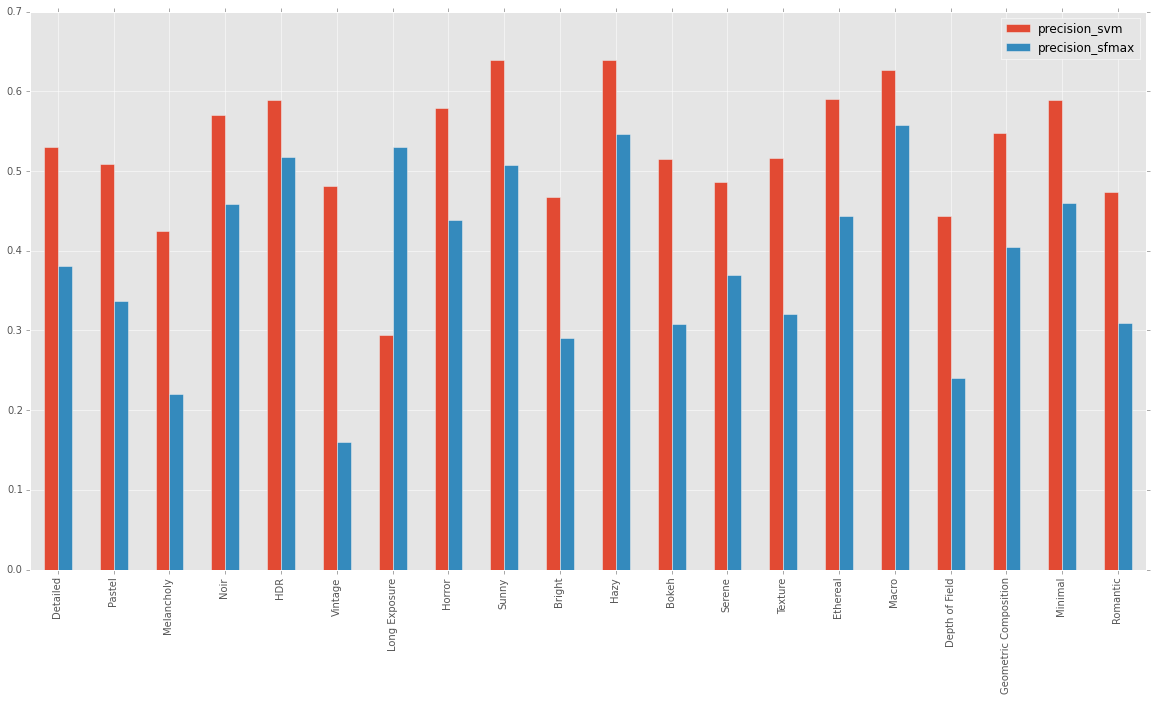

In [70]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
ax = df.plot(kind='bar')
ax.xaxis.set_ticklabels(style_names)

In [45]:
print precision_score(y_true, y_pred_svm, average=None)
print precision_score(y_true, y_pred_svm, average='weighted')

[ 0.53  0.51  0.42  0.57  0.59  0.48  0.29  0.58  0.64  0.47  0.64  0.51
  0.49  0.52  0.59  0.63  0.44  0.55  0.59  0.47]
0.525852469149


In [46]:
print precision_score(y_true, y_pred_sfmax, average=None)
print precision_score(y_true, y_pred_sfmax, average='weighted')

[ 0.38  0.34  0.22  0.46  0.52  0.16  0.53  0.44  0.51  0.29  0.55  0.31
  0.37  0.32  0.44  0.56  0.24  0.4   0.46  0.31]
0.390109975576


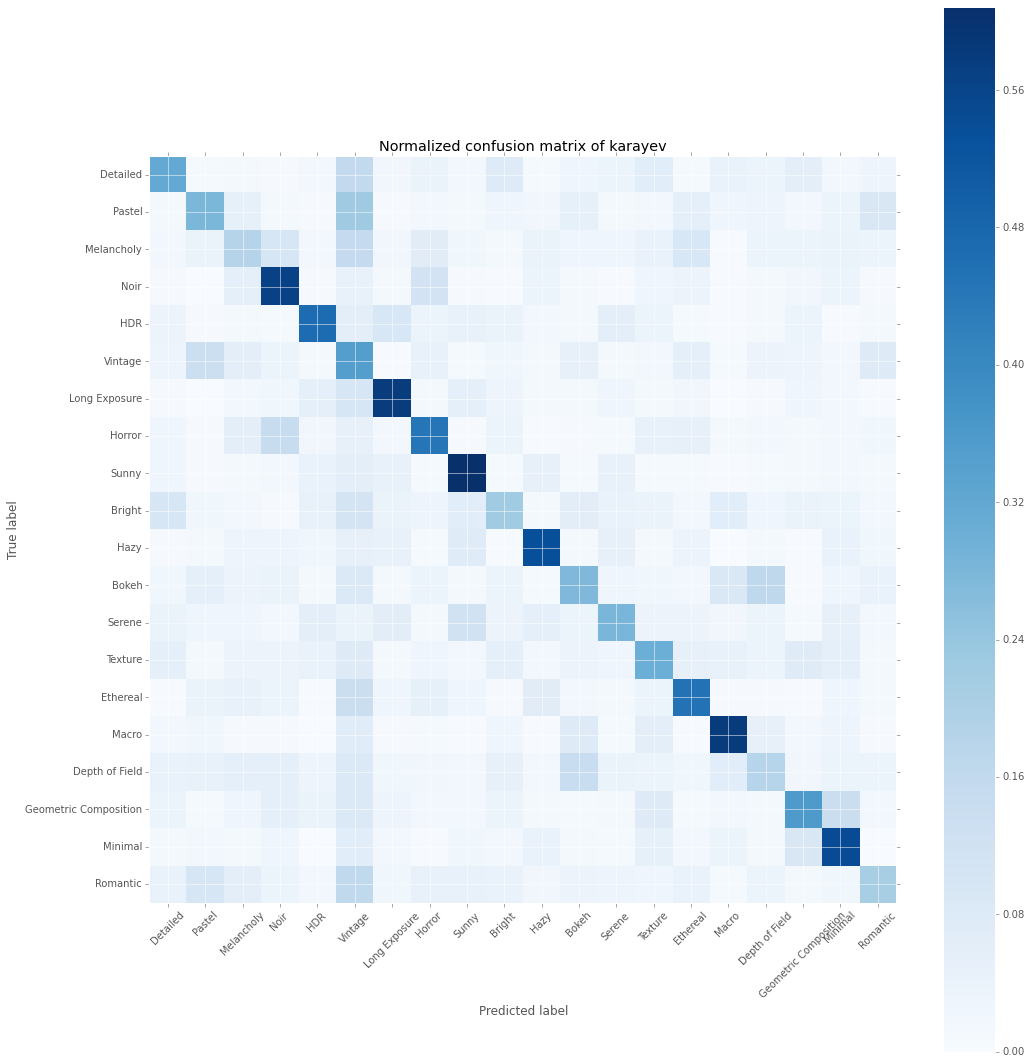

In [81]:
cm_sfmax = confusion_matrix(y_test, y_pred_sfmax)
cm_normalized = cm_sfmax.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(15, 15))
plot_confusion_matrix(cm_normalized, target_names, title='Normalized confusion matrix of karayev')
plt.show()

In [1]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_normalized = cm_sfmax.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(15, 15))
plot_confusion_matrix(cm_normalized, target_names, title='Normalized confusion matrix of our method')
plt.show()

NameError: name 'confusion_matrix' is not defined

In [2]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

In [3]:
import pickle

In [6]:
vec = pickle.load(open('feat_train.pickle', 'rb'))
model.fit_transform(vec)

MemoryError: 